# **HANDWRITTEN DIGIT RECOGNITION FOR MNIST DATASET**

## **The goal is to recognize handwritten digits from MNIST dataset.**

## **1. Load The Dataset**

In [10]:
from keras.datasets import mnist

In [12]:
# train test split
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## **2. Data Preprocessing**

In [15]:
# pixel value normalization to [0,1] and flattening
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32')/255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')/255

In [17]:
# Convert labels to numerical using one-hot encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## **3. Build the Model**

Building a neural network model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),   # Reduces overfitting
    Dense(10, activation = 'softmax')

])    
    

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **4. Model Compilation**

In [27]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']

)    

## **5. Model Training**

In [30]:
model.fit(
    x_train, y_train,
    validation_split = 0.2,    # 20% of data used for validation
    epochs = 20,    # Number of training iterations
    batch_size = 64,    # Number of samples per epoch
    verbose = 1    # Show training progress

)    

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8284 - loss: 0.5447 - val_accuracy: 0.9829 - val_loss: 0.0611
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9700 - loss: 0.0998 - val_accuracy: 0.9848 - val_loss: 0.0503
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9795 - loss: 0.0706 - val_accuracy: 0.9879 - val_loss: 0.0411
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9830 - loss: 0.0582 - val_accuracy: 0.9882 - val_loss: 0.0435
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9857 - loss: 0.0483 - val_accuracy: 0.9898 - val_loss: 0.0397
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9874 - loss: 0.0425 - val_accuracy: 0.9895 - val_loss: 0.0388
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9900 - loss: 0.0327 - val_accuracy: 0.9898 - val_loss: 0.0394
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9897 - loss: 0.0310 - val_ac

## **6. Model Evaluation**

In [33]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy : {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9910 - loss: 0.0398
Test Accuracy : 0.992900013923645


## **7. Visualize Predictions**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


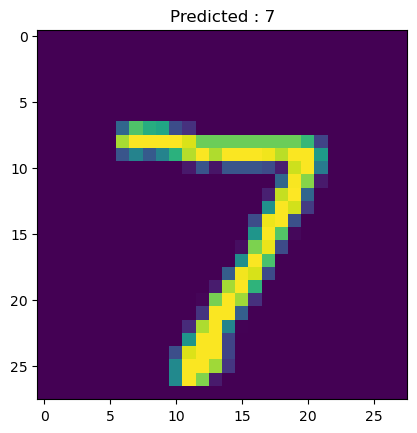

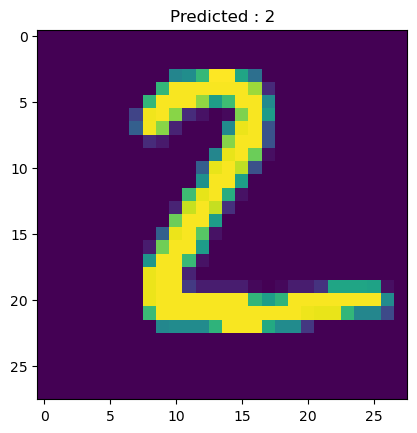

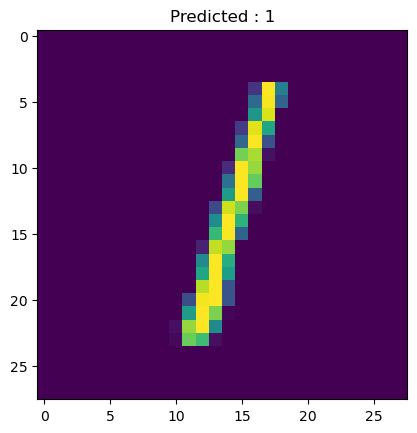

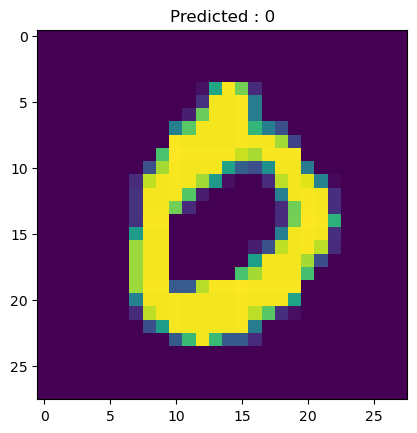

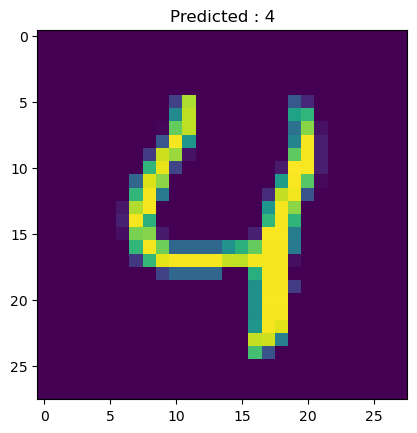

In [36]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(x_test)
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title(f"Predicted : {np.argmax(predictions[i])}")
    plt.show()

## **Check with Real Time Data**

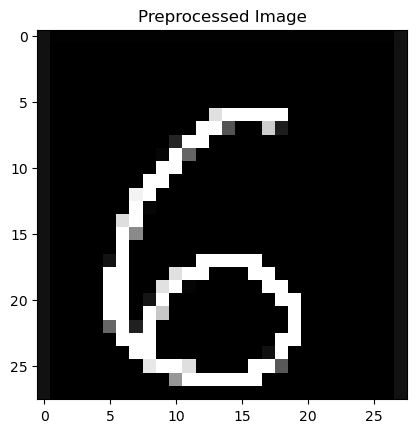

In [43]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the image 
image_path = "handwritten.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)   # Read as grayscale

# Resize the image to 28x28
img_resized = cv2.resize(img, (28, 28))

# Invert colors (if the background is white and the digit is black)
img_inverted = 255 - img_resized

# Normalize the Pixel values
img_normalized = img_inverted / 255.0

# Flatten the Image
img_reshaped = img_normalized.reshape(1, 28, 28, 1).astype('float32')

# Show the preprocessed image
plt.imshow(img_normalized, cmap = 'gray')
plt.title("Preprocessed Image")
plt.show()

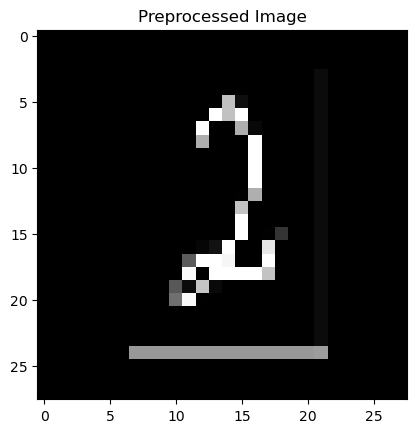

In [49]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the image 
image_path = "handwritten2.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)   # Read as grayscale

# Resize the image to 28x28
img_resized = cv2.resize(img, (28, 28))

# Invert colors (if the background is white and the digit is black)
img_inverted = 255 - img_resized

# Normalize the Pixel values
img_normalized = img_inverted / 255.0

# Flatten the Image
img_reshaped = img_normalized.reshape(1, 28, 28, 1).astype('float32')

# Show the preprocessed image
plt.imshow(img_normalized, cmap = 'gray')
plt.title("Preprocessed Image")
plt.show()

In [51]:
# Make a prediction
prediction = model.predict(img_reshaped)
predicted_digit = np.argmax(prediction)

print(f"The model predicts this digit as : {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
The model predicts this digit as : 3


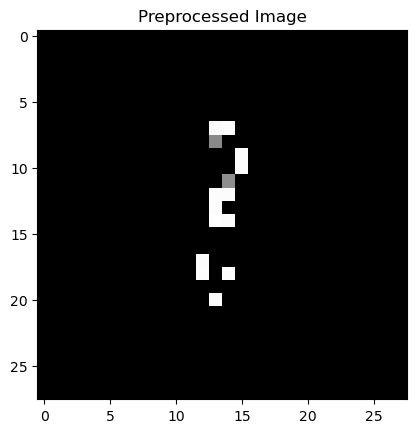

In [57]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the image 
image_path = "handwrt.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)   # Read as grayscale

# Resize the image to 28x28
img_resized = cv2.resize(img, (28, 28))

# Invert colors (if the background is white and the digit is black)
img_inverted = 255 - img_resized

# Normalize the Pixel values
img_normalized = img_inverted / 255.0

# Flatten the Image
img_reshaped = img_normalized.reshape(1, 28, 28, 1).astype('float32')

# Show the preprocessed image
plt.imshow(img_normalized, cmap = 'gray')
plt.title("Preprocessed Image")
plt.show()

In [59]:
# Make a prediction
prediction = model.predict(img_reshaped)
predicted_digit = np.argmax(prediction)

print(f"The model predicts this digit as : {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
The model predicts this digit as : 3


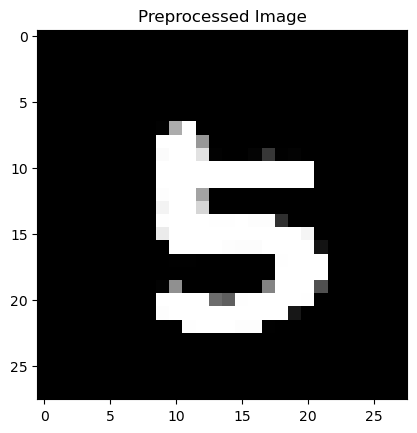

In [61]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the image 
image_path = "hndwrtn.jpeg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)   # Read as grayscale

# Resize the image to 28x28
img_resized = cv2.resize(img, (28, 28))

# Invert colors (if the background is white and the digit is black)
img_inverted = 255 - img_resized

# Normalize the Pixel values
img_normalized = img_inverted / 255.0

# Flatten the Image
img_reshaped = img_normalized.reshape(1, 28, 28, 1).astype('float32')

# Show the preprocessed image
plt.imshow(img_normalized, cmap = 'gray')
plt.title("Preprocessed Image")
plt.show()

In [63]:
# Make a prediction
prediction = model.predict(img_reshaped)
predicted_digit = np.argmax(prediction)

print(f"The model predicts this digit as : {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
The model predicts this digit as : 5


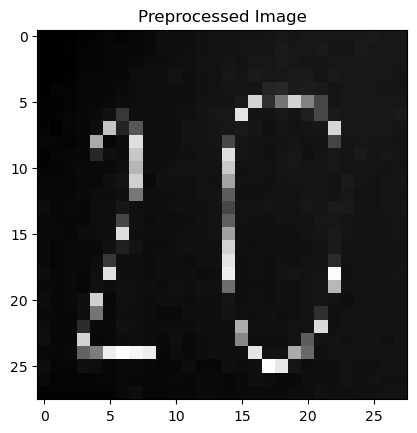

In [65]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the image 
image_path = "handwrnscrnsht.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)   # Read as grayscale

# Resize the image to 28x28
img_resized = cv2.resize(img, (28, 28))

# Invert colors (if the background is white and the digit is black)
img_inverted = 255 - img_resized

# Normalize the Pixel values
img_normalized = img_inverted / 255.0

# Flatten the Image
img_reshaped = img_normalized.reshape(1, 28, 28, 1).astype('float32')

# Show the preprocessed image
plt.imshow(img_normalized, cmap = 'gray')
plt.title("Preprocessed Image")
plt.show()

In [67]:
# Make a prediction
prediction = model.predict(img_reshaped)
predicted_digit = np.argmax(prediction)

print(f"The model predicts this digit as : {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
The model predicts this digit as : 1


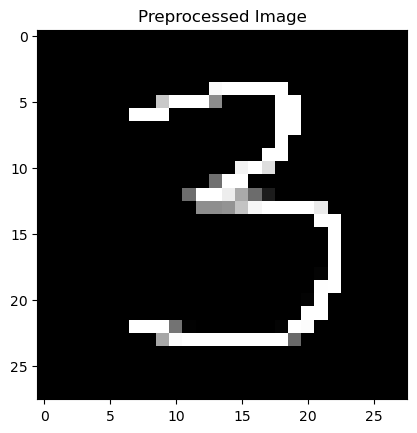

In [73]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the image 
image_path = "hwscnst.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)   # Read as grayscale

# Resize the image to 28x28
img_resized = cv2.resize(img, (28, 28))

# Invert colors (if the background is white and the digit is black)
img_inverted = 255 - img_resized

# Normalize the Pixel values
img_normalized = img_inverted / 255.0

# Flatten the Image
img_reshaped = img_normalized.reshape(1, 28, 28, 1).astype('float32')

# Show the preprocessed image
plt.imshow(img_normalized, cmap = 'gray')
plt.title("Preprocessed Image")
plt.show()

In [75]:
# Make a prediction
prediction = model.predict(img_reshaped)
predicted_digit = np.argmax(prediction)

print(f"The model predicts this digit as : {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
The model predicts this digit as : 3
